In [6]:
import pandas as pd

file_path = "data/dataset.csv"
df = pd.read_csv(file_path)

In [7]:
df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [8]:
rows = len(df.index)
rows

6417106

In [9]:
list(pd.unique(df['review_score']))

[np.int64(1), np.int64(-1)]

In [10]:
list(pd.unique(df['review_votes']))

[np.int64(0), np.int64(1)]

In [11]:
print(df.isnull().sum())
df.dtypes

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64


app_id           int64
app_name        object
review_text     object
review_score     int64
review_votes     int64
dtype: object

In [12]:
df = df.dropna()

In [13]:
print(df.isnull().sum())
df.dtypes

app_id          0
app_name        0
review_text     0
review_score    0
review_votes    0
dtype: int64


app_id           int64
app_name        object
review_text     object
review_score     int64
review_votes     int64
dtype: object

In [14]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

app_id          0.0
app_name        0.0
review_text     0.0
review_score    0.0
review_votes    0.0
dtype: float64


In [9]:
print(df[['review_score', 'review_votes']].describe())

       review_score  review_votes
count  6.417106e+06  6.417106e+06
mean   6.394992e-01  1.472446e-01
std    7.687918e-01  3.543496e-01
min   -1.000000e+00  0.000000e+00
25%    1.000000e+00  0.000000e+00
50%    1.000000e+00  0.000000e+00
75%    1.000000e+00  0.000000e+00
max    1.000000e+00  1.000000e+00


Review Score Distribution (%):
 review_score
 1    81.974959
-1    18.025041
Name: proportion, dtype: float64
Review Votes Distribution (%):
 review_votes
0    85.275543
1    14.724457
Name: proportion, dtype: float64


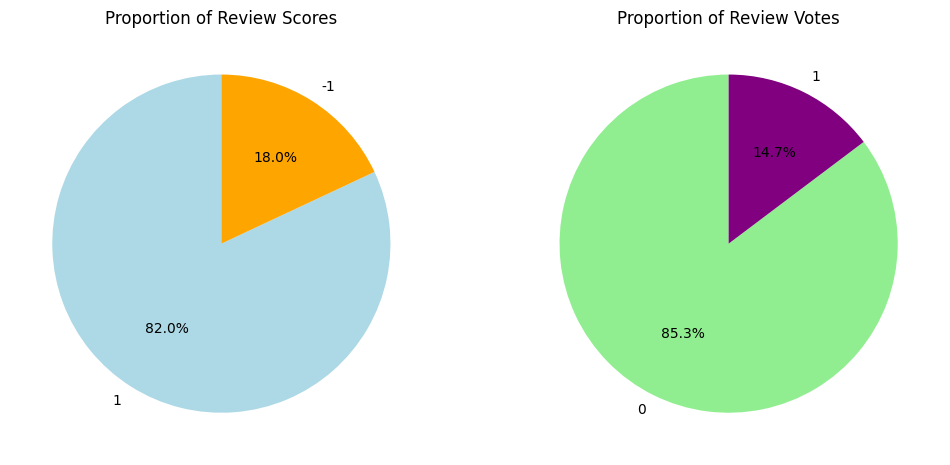

In [18]:
score_counts = df['review_score'].value_counts(normalize=True) * 100
print("Review Score Distribution (%):\n", score_counts)

vote_counts = df['review_votes'].value_counts(normalize=True) * 100
print("Review Votes Distribution (%):\n", vote_counts)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    score_counts, 
    labels=score_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'orange']
)
axes[0].set_title('Proportion of Review Scores')

axes[1].pie(
    vote_counts, 
    labels=vote_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'purple']
)
axes[1].set_title('Proportion of Review Votes')
plt.savefig("review_pie_charts.pdf", format='pdf')
plt.show()

In [11]:
unique_apps = df['app_name'].nunique()
print(f'Number of unique applications: {unique_apps}')

Number of unique applications: 9363


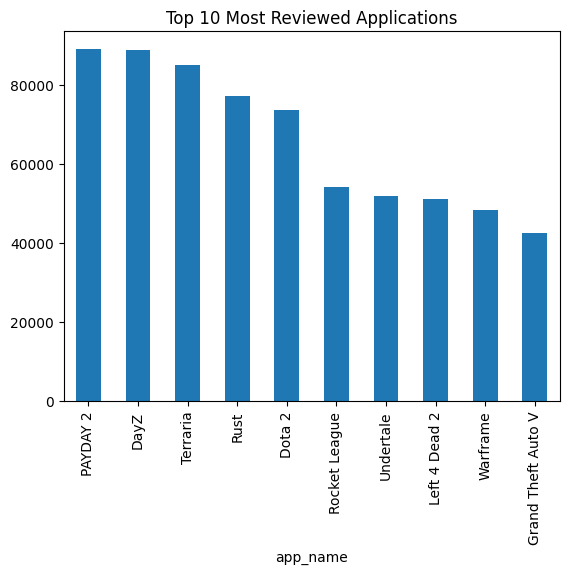

In [17]:
top_apps = df['app_name'].value_counts().head(10)
top_apps.plot(kind='bar')
plt.title('Top 10 Most Reviewed Applications')
plt.savefig("top_apps.pdf", format='pdf')
plt.show()

In [13]:
app_scores = df.groupby('app_name')['review_score'].mean().sort_values(ascending=False).head(10)
print(app_scores)

app_name
Discovering Colors - Animals                         1.0
Fabric                                               1.0
Trigonarium                                          1.0
Aveyond 3-3: The Lost Orb                            1.0
Aveyond 3-4: The Darkthrop Prophecy                  1.0
Reverse x Reverse                                    1.0
Awakening: The Redleaf Forest Collector's Edition    1.0
F-19 Stealth Fighter                                 1.0
Rise of Keepers                                      1.0
Extravaganza Rising                                  1.0
Name: review_score, dtype: float64


In [20]:
reviews_text = df['review_text'].reset_index(name='text')

tc = reviews_text['text'].value_counts().reset_index(name='count')
tc.rename(columns={'index': 'text'}, inplace=True)
tc.head(10)

,text,count
0,Early Access Review,1013351
1,Early Access Review,11334
2,10/10,6147
3,.,4885
4,Great game,3710
5,great game,3642
6,Great game!,2493
7,:),2140
8,Nice game,1839
9,♥♥♥♥,1711


In [7]:
df['review_text'] = df['review_text'].str.strip()
df = df[df['review_text'] != "Early Access Review"]

In [34]:
reviews_text = df['review_text'].reset_index(name='text')

tc = reviews_text['text'].value_counts().reset_index(name='count')
tc.rename(columns={'index': 'text'}, inplace=True)
tc.head(10)

,text,count
0,10/10,6442
1,.,4920
2,great game,4016
3,Great game,3878
4,Great game!,2501
5,:),2223
6,Nice game,1934
7,♥♥♥♥,1792
8,Great Game,1777
9,cool,1753


In [35]:
df.head(10)

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
5,10,Counter-Strike,"No r8 revolver, 10/10 will play again.",1,1
6,10,Counter-Strike,Still better than Call of Duty: Ghosts...,1,1
7,10,Counter-Strike,"cant buy skins, cases, keys, stickers - gaben ...",1,1
8,10,Counter-Strike,"Counter-Strike: Ok, after 9 years of unlimited...",1,1
9,10,Counter-Strike,Every server is spanish or french. I can now f...,1,0


In [5]:
df.to_csv('dataset_without_null.csv', index=False)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

In [16]:
train.to_csv('train_without_null.csv', index = False)

In [17]:
test.to_csv('test_without_null.csv', index = False)

In [20]:
import pandas as pd
import numpy as np

num_chunks = 5

shuffled_indices = np.random.permutation(df.index)

chunks = np.array_split(shuffled_indices, num_chunks)

for i, chunk_indices in enumerate(chunks):
    chunk = df.loc[chunk_indices]  
    chunk = chunk.dropna()
    chunk.to_csv(f'train_without_null_{i + 1}.csv', index=False)